In [251]:
%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook that handles data loading! 

This notebook is used to initially load and prepare data. This means loading into a datamanager, merging data (if wanted), and doing any preliminary alterations to the dataset. 

In [252]:
from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()
# loads all data into the datamanager 
dm.data_loader()


## Now we look at sample rates

the training weather data is sampled every 15 minutes, whilst the pv_measurements are every hour. 
We can either 
1. sample down. Making weather data be every hour using the mean value of every hour 
2. sample up. Making the pv_measurement every 15 min instead of every hour. 

In [253]:
dm.X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,...,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,...,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,...,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,...,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,...,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,...,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


In [254]:
# Sample down
import pandas as pd 

def resample_func(dataset:pd.DataFrame): 

    if "date_calc" in dataset.columns : 



        dataset = dataset.drop("date_calc", axis=1)
    

    dataset = dataset.copy().resample("H", on="date_forecast").mean().dropna(subset=["direct_rad:W"])
    dataset["date_forecast"] = dataset.index

    return dataset





dm.X_train_observed_a = resample_func(dm.X_train_observed_a)
dm.X_train_observed_b = resample_func(dm.X_train_observed_b) 
dm.X_train_observed_c = resample_func(dm.X_train_observed_c) 
dm.X_train_estimated_a = resample_func(dm.X_train_estimated_a)
dm.X_train_estimated_b = resample_func(dm.X_train_estimated_b)
dm.X_train_estimated_c = resample_func(dm.X_train_estimated_c)
dm.X_test_estimated_a = resample_func(dm.X_test_estimated_a)
dm.X_test_estimated_b = resample_func(dm.X_test_estimated_b)
dm.X_test_estimated_c = resample_func(dm.X_test_estimated_c)



In [255]:
dm.X_train_observed_a

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,date_forecast
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.00,1728.949951,0.0,280.299988,0.000,0.000000,...,-3.774250,0.0,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0,2019-06-02 22:00:00
2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.00,1689.824951,0.0,280.299988,0.000,0.000000,...,-4.357250,0.0,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0,2019-06-02 23:00:00
2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.00,1563.224976,0.0,280.649994,0.000,0.000000,...,-3.309500,0.0,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0,2019-06-03 00:00:00
2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.75,1283.425049,0.0,281.674988,0.300,526.775024,...,-0.822500,0.0,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0,2019-06-03 01:00:00
2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.10,1003.500000,0.0,282.500000,11.975,22068.949219,...,3.051250,0.0,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0,2019-06-03 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20 21:00:00,5.575,1.28400,NaN,0.000000,0.00,686.900024,0.0,275.200012,0.000,0.000000,...,-33.860748,0.0,277.850006,19.500000,39001.398438,1.675,0.250,1.675,0.0,2022-10-20 21:00:00
2022-10-20 22:00:00,5.350,1.28700,NaN,0.000000,0.00,149.500000,0.0,274.600006,0.000,0.000000,...,-36.270000,0.0,277.475006,9.700000,35336.726562,1.400,0.050,1.400,0.0,2022-10-20 22:00:00
2022-10-20 23:00:00,5.200,1.29050,NaN,0.000000,0.00,NaN,0.0,274.174988,0.000,0.000000,...,-36.614998,0.0,277.149994,4.525000,27164.625000,1.300,-0.175,1.300,0.0,2022-10-20 23:00:00


## Combining data into one training set 

In [256]:
dm.data_A, dm.data_B, dm.data_C = dm.combine_data()

print(dm.data_A.shape, dm.data_B.shape, dm.data_C.shape, dm.data.shape)


(34061, 47) (32819, 47) (26071, 47) (0, 0)


## Removing const y values
This is most likely due to errors in measurement device. Since it doesn't make sense to train on data with errors, we will remove the entire rows

In [257]:
dm.data_B.isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               5156
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   2171
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:hPa                     0


In [258]:
val = None
counter = 0
consequtive_zero_threshold = 23
threshold = 0.0

def remove_const_intervals(row):
    global val
    global counter
    global consequtive_zero_threshold

    if val is None: # init val as row 
        val = row
        return False

    elif val == 0.0: ## if the current value is 0.0 

        counter += 1 ## we count this 

        if counter >= consequtive_zero_threshold: ## number of seen consequtive zeros are above threshold
            val = row
            counter += 1
            return False
        
        else: 
            val = row
            return True ## we have not yet gone past threshold

    elif abs(row-val)<= threshold: ## we see a value (not zero) if below threshold we remove, this also indicates a break in any streak of zeros, setting counter to zero
        val = row
        counter = 0
        return False
    
    counter = 0
    val = row
    return True ## if all else fails, we keep the row. 


dm.data_B = dm.data_B[dm.data_B['pv_measurement'].map(remove_const_intervals)].reset_index(drop=True)


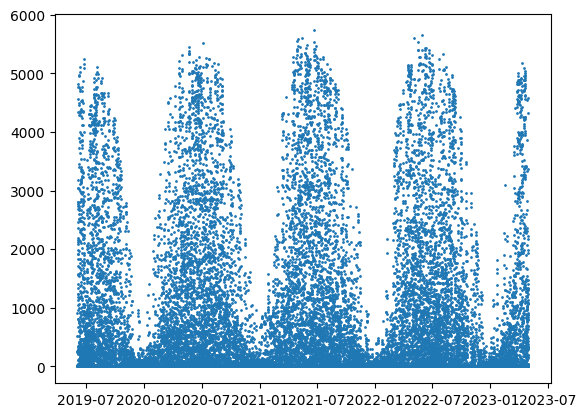

In [259]:
import matplotlib.pyplot as plt 

plt.scatter(x=dm.data_A["date_forecast"] , y=dm.data_A["pv_measurement"], s=1)

In [260]:
%store dm

Stored 'dm' (Data_Manager)


In [261]:
dm.data_B

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,date_forecast,pv_measurement
0,5.425,1.23975,1131.424927,0.000000,0.000,1131.424927,0.0,274.825012,0.000,0.000000,...,0.000,278.075012,99.074997,12777.449219,3.550,1.525,3.200,0.0,2019-01-01 01:00:00,0.000000
1,5.400,1.23850,1061.000000,0.000000,0.000,1061.000000,0.0,274.799988,0.000,0.000000,...,0.100,278.049988,97.925003,11140.500000,4.025,2.150,3.425,0.0,2019-01-01 02:00:00,0.000000
2,5.350,1.23975,1021.150024,0.000000,0.000,1021.150024,0.0,274.674988,0.000,0.000000,...,0.200,277.600006,97.224998,6799.200195,4.900,3.425,3.500,0.0,2019-01-01 03:00:00,0.000000
3,5.675,1.23750,1033.699951,0.000000,0.000,1033.699951,0.0,275.500000,0.000,0.000000,...,0.175,277.649994,96.824997,5580.475098,6.050,5.575,2.200,0.0,2019-01-01 04:00:00,0.000000
4,5.950,1.23525,1046.275024,0.000000,0.000,1046.275024,0.0,276.200012,0.000,0.000000,...,0.150,278.399994,96.025002,8248.950195,5.975,5.975,-0.100,0.0,2019-01-01 05:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.550,1.27650,1677.949951,84462.523438,4.225,542.849976,0.0,272.424988,2.825,56433.972656,...,0.000,275.024994,96.724998,23434.074219,5.175,4.800,1.925,0.0,2023-04-30 19:00:00,0.828587
26578,4.500,1.27875,1766.500000,2270.774902,0.000,546.349976,0.0,272.299988,0.000,5067.024902,...,0.000,274.650024,94.525002,21307.724609,4.650,4.025,2.300,0.0,2023-04-30 20:00:00,-0.000000
26579,4.500,1.27900,1698.925049,0.000000,0.000,548.049988,0.0,272.299988,0.000,0.000000,...,0.000,274.524994,95.650002,21159.224609,4.450,3.600,2.600,0.0,2023-04-30 21:00:00,-0.000000
26580,4.500,1.27975,1354.824951,0.000000,0.000,527.599976,0.0,272.274994,0.000,0.000000,...,0.100,274.325012,98.875000,14371.775391,4.100,3.200,2.550,0.0,2023-04-30 22:00:00,-0.000000


In [262]:
data_A = dm.data_A.drop("date_forecast", axis=1)
data_B = dm.data_B.drop("date_forecast", axis=1)
data_C = dm.data_C.drop("date_forecast", axis=1)

X_submission_A = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(data_A.columns)]
X_submission_B = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(data_B.columns)]
X_submission_C = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(data_C.columns)]


X_submission_A





,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,4.325,1.28675,912.700012,0.000000,0.000000,1061.550049,0.0,271.650024,0.000000,0.000000,...,16.026501,-10.54100,0.000,273.799988,74.949997,29907.500000,3.950,2.100,3.350,0.0
2023-05-01 01:00:00,4.275,1.28600,1482.099976,0.000000,0.000000,1075.100098,0.0,271.450012,0.000000,0.000000,...,30.497250,-7.89450,0.000,273.799988,77.474998,29519.074219,3.825,1.925,3.300,0.0
2023-05-01 02:00:00,4.150,1.28375,1791.300049,0.000000,0.000000,1200.400024,0.0,271.049988,0.000000,0.000000,...,44.517250,-3.81550,0.000,273.849976,88.099998,31009.125000,3.650,1.750,3.200,0.0
2023-05-01 03:00:00,4.025,1.28200,2312.875000,10124.424805,11.675000,1179.849976,0.0,270.649994,9.375000,16845.226562,...,58.083000,1.41250,0.000,273.899994,68.599998,34552.500000,3.500,1.450,3.150,0.0
2023-05-01 04:00:00,3.900,1.28100,2198.299805,141748.593750,76.875000,920.049988,0.0,270.375000,47.400002,102209.703125,...,71.341003,7.46850,0.000,273.924988,66.300003,35483.875000,3.325,1.300,3.050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 19:00:00,8.350,1.19725,3638.899902,477093.187500,85.099998,2013.750000,0.0,281.575012,33.625000,168774.546875,...,306.687012,8.15300,0.100,287.024994,86.150002,44056.375000,2.450,2.075,-1.350,0.0
2023-07-03 20:00:00,8.525,1.20050,3552.100098,184335.671875,24.799999,1610.900024,0.0,281.850006,14.325000,86321.125000,...,319.704010,3.26800,0.000,286.600006,75.324997,44017.175781,2.450,2.100,-1.250,0.0
2023-07-03 21:00:00,8.825,1.20450,2315.000000,37429.328125,1.275000,1622.800049,0.0,282.325012,1.300000,28169.150391,...,333.040009,-0.44325,0.000,286.100006,76.849998,43302.050781,2.575,2.150,-1.400,0.0


In [263]:
from autogluon.tabular import TabularPredictor


predictor_A = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/gluon_beast/A')\
    .fit(data_A, 
         presets=['best_quality'])


OSError: [Errno 30] Read-only file system: '/gluon_beast'

In [ ]:
from autogluon.tabular import TabularPredictor


predictor_B = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/gluon_beast/A')\
    .fit(data_B, 
         presets=['best_quality'])


In [ ]:
from autogluon.tabular import TabularPredictor


predictor_C = TabularPredictor(label="pv_measurement", 
                             eval_metric="mean_absolute_error", 
                             path='/gluon_beast/A')\
    .fit(data_C, 
         presets=['best_qualitbest'])


In [ ]:
preds_A = pd.DataFrame(predictor_B.predict(X_submission_A))
preds_A

In [ ]:
preds_B = pd.DataFrame(predictor_B.predict(X_submission_B))
preds_B

In [ ]:
preds_C = pd.DataFrame(predictor_C.predict(X_submission_C))
preds_C